<a href="https://colab.research.google.com/github/raiyan12999/colab/blob/main/one_piece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('ONE PIECE.csv')
df.head()

,Unnamed: 0,rank,trend,season,episode,name,start,total_votes,average_rating
0,0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,2,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,3,"28,818",8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,4,"37,113",4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5


In [6]:
filler_ranges = [(54, 60), (98, 99), (131, 143), (196, 206), (220, 225), (279, 283),
    (291, 292), (317, 319), (326, 336), (382, 384), (406, 407), (426, 429),
    (457, 458), (575, 578), (747, 750), (780, 782), (895, 896), (1029, 1030)]

filler_singles = [102, 303, 492, 542, 590, 626, 627, 907]

filler_episodes = set()
for start, end in filler_ranges:
  # print(f"Filler episode range starts at {start} and ends at {end}")
  filler_episodes.update(range(start, end+1))
  # range (start, end+1) includes all the episode from start to end
  # Then update converts them into an array and dump them into filler_episodes

filler_episodes.update(filler_singles)
print(filler_episodes)

{1029, 1030, 542, 54, 55, 56, 57, 58, 59, 60, 575, 576, 577, 578, 590, 98, 99, 102, 626, 627, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 220, 221, 222, 223, 224, 225, 747, 748, 749, 750, 780, 781, 782, 279, 280, 281, 282, 283, 291, 292, 303, 317, 318, 319, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 382, 383, 384, 895, 896, 907, 406, 407, 426, 427, 428, 429, 457, 458, 492}


In [7]:
canon_df = df[~df['episode'].isin(filler_episodes)]
canon_df.shape

(866, 9)

In [8]:
df.shape

(958, 9)

In [9]:
selected_columns = ['season', 'episode', 'name', 'average_rating']
new_df1 = canon_df[selected_columns]
new_df1.head()

,season,episode,name,average_rating
0,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,7.6
1,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",7.8
2,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,7.7
3,1,4,Luffy's Past! The Red-haired Shanks Appears!,8.1
4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",7.5


In [13]:
new_df2 = canon_df[['season',  'episode', 'name', 'average_rating']]
new_df2.head()

,season,episode,name,average_rating
0,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,7.6
1,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",7.8
2,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,7.7
3,1,4,Luffy's Past! The Red-haired Shanks Appears!,8.1
4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",7.5


In [14]:
%pip install matplotlib seaborn

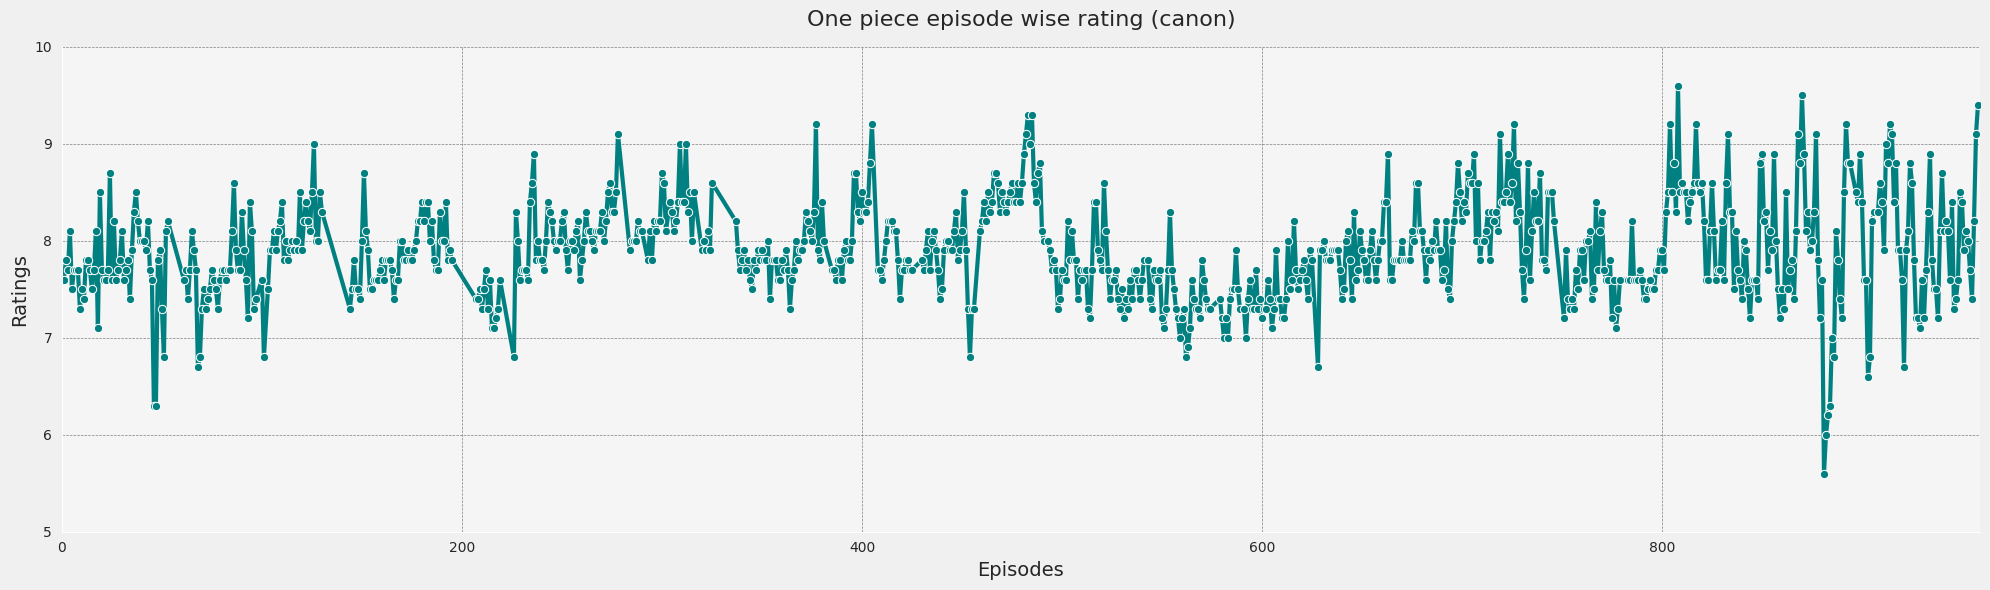

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')

plt.figure(figsize=(20,6),  facecolor='#f0f0f0')
sns.lineplot(data = new_df1, x = 'episode', y = 'average_rating', marker = 'o', color='teal', linewidth=3, linestyle='-')

# for index, row in new_df1.iterrows():
#     if row['average_rating'] >= 9 or row['average_rating'] <= 7:
#         plt.annotate(
#             f"Ep {int(row['episode'])}: {row['average_rating']}",
#             xy=(row['episode'], row['average_rating']),
#             xytext=(0, 10),  # Offset above point
#             textcoords='offset points',
#             ha='center',
#             fontsize=10,
#             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.8)
#         )

plt.title('One piece episode wise rating (canon)', fontsize=16, pad=15)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.ylim(5, 10)
# plt.yticks(np.arange(1, 11, 1))
plt.xlim(0, max(new_df1['episode']) + 1)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.tight_layout()

plt.savefig('canon.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
high_rated_episodes = new_df1[new_df1['average_rating'] >= 8.5]
high_rated_episodes = high_rated_episodes[['episode', 'name', 'average_rating']]
high_rated_episodes.describe()

,episode,average_rating
count,115.000000,115.000000
mean,622.852174,8.755652
std,261.269178,0.261638
min,19.000000,8.500000
25%,457.000000,8.500000
50%,719.000000,8.700000
75%,832.500000,8.900000
max,958.000000,9.600000


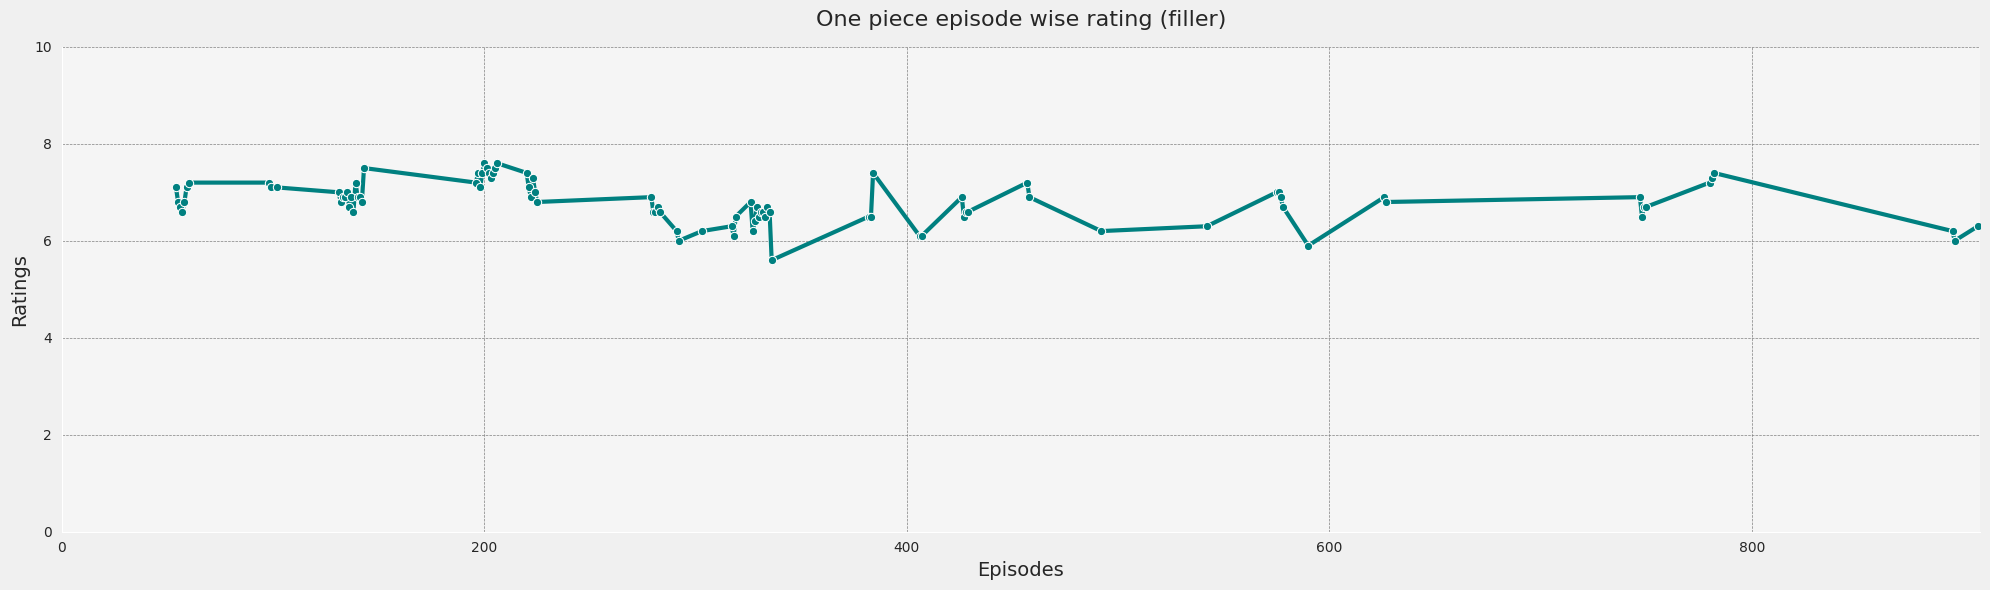

In [69]:
# graph for only the filler episode

filler_df = df[df['episode'].isin(filler_episodes)]
# filler_df.head()
# filler_df.shape

selected_filler_columns = ['episode', 'name', 'average_rating']
filler_df = filler_df[selected_filler_columns]
# filler_df.head()
# filler_df.shape

sns.set_style('darkgrid')

plt.figure(figsize=(20,6),  facecolor='#f0f0f0')
sns.lineplot(data = filler_df, x = 'episode', y = 'average_rating', marker = 'o', color='teal', linewidth=3, linestyle='-')

# for index, row in filler_df.iterrows():
#   if row['average_rating'] >= 7:
#     plt.annotate(
#         f"Ep {int(row['episode'])}",
#         xy=(row['episode'], row['average_rating']),
#         xytext=(0,10),
#         textcoords='offset points',
#         ha='center',
#         fontsize=5,
#         bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.8)
#     )

plt.title('One piece episode wise rating (filler)', fontsize=16, pad=15)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.ylim(0, 10)
# plt.yticks(np.arange(1, 11, 1))
plt.xlim(0, max(filler_df['episode']) + 1)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.tight_layout()

plt.savefig('filler.png', dpi=300, bbox_inches='tight')
plt.show()

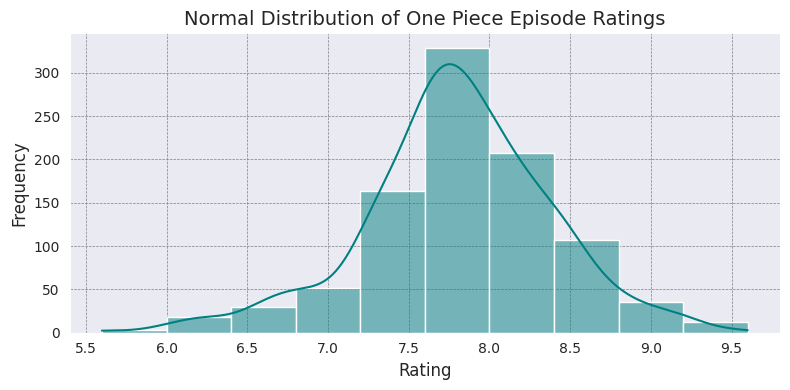

In [71]:
#normal distribution curvee
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='average_rating', kde=True, color='teal', bins=10)
plt.title('Normal Distribution of One Piece Episode Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plot_path = 'ratings_distribution.png'
# plt.savefig(plot_path, dpi=300, bbox_inches='tight')
# plt.close()
plt.show()

In [87]:
total_episodes = len(df)
no_epi_above_9 = df[df['average_rating'] >= 9].shape[0]
no_epi_above_8_5 = df[df['average_rating'] >= 8.5].shape[0]
no_epi_below_8 = df[df['average_rating'] < 8].shape[0]
percent_above_9 = (no_epi_above_9 / total_episodes) * 100
percent_above_8_5 = (no_epi_above_8_5 / total_episodes) * 100
percent_below_8 = (no_epi_below_8 / total_episodes) * 100
mean_rating = df['average_rating'].mean()
percent_above_8_5

12.004175365344468

In [88]:
one_piece_table = pd.DataFrame({
    'Anime Name' : ['One Piece'],
    'Rating Above 9' : [no_epi_above_9],
    'Percentage Above 9' : [percent_above_9],
    'Rating Above 8.5' : [no_epi_above_8_5],
    'Percentage Above 8.5' : [percent_above_8_5],
    'Rating Below 8' : [no_epi_below_8],
    'Percentage Below 8' : [percent_below_8],
    'Mean Rating' : [mean_rating]
})
one_piece_table

,Anime Name,Rating Above 9,Percentage Above 9,Rating Above 8.5,Percentage Above 8.5,Rating Below 8,Percentage Below 8,Mean Rating
0,One Piece,25,2.609603,115,12.004175,596,62.212944,7.796555


In [89]:
# prompt: download one piece table as csv

one_piece_table.to_csv('one_piece_summary.csv', index=False)
from google.colab import files
files.download('one_piece_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>